In [135]:
import numpy as np 
import pandas as pd 
from sklearn import tree 
from IPython.display import Image 
from sklearn.externals.six import StringIO
from sklearn.ensemble import RandomForestClassifier
import pydotplus


In [136]:
input_file = "./dataset/PastHires.csv"
df = pd.read_csv(input_file, header=0)

In [137]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [138]:
d = {'Y': 1 , 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0 , 'MS': 1, 'PhD' : 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [139]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [140]:
y = df["Hired"]
X = df [features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

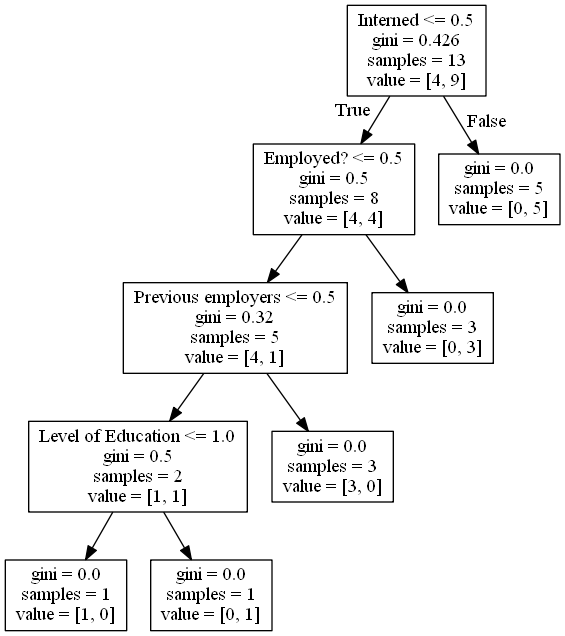

In [141]:
dot_data = StringIO()
tree.export_graphviz(clf,out_file=dot_data,feature_names=features)
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())
#graph.write_png("./grafics/Decision.png")

In [142]:
cff = RandomForestClassifier(n_estimators = 10)
clf = clf.fit(X,y)

#Predict employment of an employed 10-year veteran 
print(clf.predict([[10,1,4,0,0,0]]))
# ... and an unemployed 10-year veteran 
print(clf.predict([[10,0,4,0,0,0]]))

[1]
[0]
